# Proyecto Sprint 7

## Analisis de datos de Videojuegos

### 1: Importacion de librerias

In [3]:
# Se importa librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import math as math
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

### 2: Importacion de datos

In [4]:
# Se importan los datos

games = pd.read_csv("games.csv")

### 3: Preparar los datos

#### a) Informacion del Dataframe

In [5]:
# Se imprime la informacion del DataFrame

print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [6]:
# Se imprime las 10 primeras filas del DataFrame para conocer la informacion del mismo

print(games.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

#### b) Cambio de nombres de las columnas

In [7]:
# Se pone en minusculas los nombres de las columnas

new_columns_name = [] #Se crea una lista vacia para almacenar los nombres de las columnas

for old_name in games.columns: #Se crea un bucle para interar en los nombres de las columnas
    name_lowered = old_name.lower() #Se cambia el nombre de las columnas a minusculas
    new_columns_name.append(name_lowered) #Se añaden los nuevos nombres a la lista vacia

games.columns = new_columns_name #Se cambia el nombre de las columnas

print(games.info()) #Se comprueba que los nombres de las columnas esten en minusculas

print()
print(games.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         

#### c) Valores duplicados

In [8]:
# Comprobacion de valores duplicados 

print(f"Existen: {games.duplicated().sum()} valores duplicados")

Existen: 0 valores duplicados


#### d) Valores NaN 

In [9]:
# Comprobacion de valores NaN

print(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


#### e) Valores NaN en "Name"

In [10]:
# Se reemplaza los valores ausentes NaN en 'name' por 'Unknown' 

games['name'] = games['name'].fillna("Unknown")

print(games.isna().sum())


name                  0
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


#### f) Valores NaN y conversion de tipos de datos en "year_of_release" 

In [11]:
# Se reemplaza los valores ausentes NaN en "year_of_release" por "0"

games['year_of_release'] = games['year_of_release'].fillna('0')

print(games.isna().sum())

# Se cambia el tipo de dato de la columna "year_of_realese" a tipo integer

games['year_of_release'] = games['year_of_release'].astype("int")

print()
print(games.info())

name                  0
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64

#### Justificacion conversion de tipo de datos

Se cambio el tipo de datos de la columna "year_of_release" de float a integer debido a que los años no tienen decimales, y resulta mas comodo trabajar con tipo de datos integer.

#### g) Valores NaN en "genre"

In [12]:
# Se reemplaza los valores ausentes NaN en "year_of_release" por "Unknown"

games['genre'] = games['genre'].fillna("Unknown")

print(games.isna().sum())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


#### h) Valores NaN en "critic_score"

In [13]:
# Se rellenaran los valores NaN por "uknown"

print(games.isna().sum())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Se dejan los valores NaN para evitar confusiones con laa puntuacion de la critica de manera global

#### i) Valores NaN en "user_score" y conversion de tipo de datos

In [14]:
# Se observal los valores unicos 

print(games['user_score'].unique())



['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [15]:
#Se reemplazan los valores "tbd" por "NaN"

games['user_score'] = games['user_score'].replace('tbd', np.nan)
print(games['user_score'].unique())
print()
print(games.info())


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   

#### Justificacion "tbd"

Se le cambio los datos "tbd" a "NaN" ya que como son valores que no estan conocidos, los manejamos como los valores ausentes.

In [16]:
#Se cambia el tipo de datos a "float"

games['user_score'] = games['user_score'].astype('float')

print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


#### Justificacion conversion de tipo de datos

Se cambio el tipo de datos de la columna "user_score" de object a float debido a que tiene valores numericos con los que vamos a necesitar realizar calculos.

#### k) Valores NaN en "rating"

In [17]:
# Se reemplaza los valores ausentes NaN en "rating" por "Unknown"

games['rating'] = games['rating'].fillna("Uknown")

print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64


#### Conclusiones sobre valores ausentes

Para los valores ausentes de "year_of_release" decidi colocar 0 en estos espacios debido a que no existe esta informacion, y es una forma de indicar que no existe informacion para esos juegos, y no se puede eliminar ya que se va a perder informacion de las otras columnas.

Para los valores de "name" y "genre" decidi rellenar los espacios vacios con "Uknown" pese a que son pocas filas, es mejor mantener la informacion intacta si es posible.

Para los valores ausentes de "critic_score" y "user_score" se decidio dejar los valores como NaN para no alterar los datos estadisticos agregando puntuaciones que no conocemos

Para los valores ausentes de "rating" se decidio reemplazar los valores vacios por "Uknown" para de esta manera tener intactas la informacion restante de sus filas.

#### Porque se piensa que estos valores estan ausentes?

Los valores pueden estar ausentes por:

1) Errores en la recoleccion de datos.
2) Datos no disponibles.
3) Errores en la conversion de datos.

#### l) Calculo de ventas totales por juego

In [18]:
# Se crea una funcion que calcula las ventas totales de cada region por juego

def sales(row):
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    
    total_sales = na_sales + eu_sales + jp_sales + other_sales
    return total_sales

games['total_sales'] = games.apply(sales, axis = 1)

print(games.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score  rating  \
0     28.96      3.77         8.45          76.0         8.0       E   
1      3.58      6.81         0.77           NaN         NaN  Uknown   
2     12.76      3.79         3.29          82.0         8.3       E   
3     10.93      3.28         2.95          80.0         8.0       E   
4      8.89     10.22         1.00           NaN         NaN  Uknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.

### 4: Analisar los datos

#### a) Cuantos juegos fueron lanzados por año?

In [19]:
# Se realiza una agrupacion de cantidad de juegos lanzada por años

df_quantity_per_yer = games.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index() # Se ordena de mayor a menor y se resetea su indixe
df_quantity_per_yer.columns = ['year_of_release', 'quantity'] # Se cambia el nombre de las nuevas columnas
df_quantity_per_yer = df_quantity_per_yer.query("year_of_release != 0") # Se elimina la fila que tiene un "0"
print('Cantidad de juegos lanzados por año de mayor a menor:')
print()
print(df_quantity_per_yer)

Cantidad de juegos lanzados por año de mayor a menor:

    year_of_release  quantity
0              2008      1427
1              2009      1426
2              2010      1255
3              2007      1197
4              2011      1136
5              2006      1006
6              2005       939
7              2002       829
8              2003       775
9              2004       762
10             2012       653
11             2015       606
12             2014       581
13             2013       544
14             2016       502
15             2001       482
16             1998       379
17             2000       350
18             1999       338
19             1997       289
21             1996       263
22             1995       219
23             1994       121
24             1993        62
25             1981        46
26             1992        43
27             1991        41
28             1982        36
29             1986        21
30             1989        17
31             

In [20]:
print(df_quantity_per_yer.head(10)) #Se muestra los mejores 10 años de lanzamientos 

   year_of_release  quantity
0             2008      1427
1             2009      1426
2             2010      1255
3             2007      1197
4             2011      1136
5             2006      1006
6             2005       939
7             2002       829
8             2003       775
9             2004       762


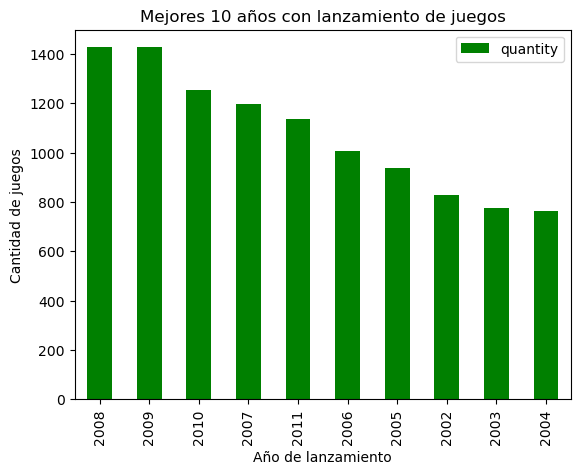

In [21]:
#Se realiza un grafico de barras de los 10 mejores años de lanzamientos de juegos
df_quantity_per_yer.head(10).plot(kind = 'bar',
                         x = 'year_of_release',
                         y = 'quantity',
                         title = 'Mejores 10 años con lanzamiento de juegos',
                         xlabel = 'Año de lanzamiento',
                         ylabel = 'Cantidad de juegos',
                         color = 'green')
plt.show()

Los años de mayor lanzamientos son 2008 y 2009 se puede observar que son muy similares

#### b) Variacion de ventas por consolas atravez de los años

In [22]:
# Se realiza una agrupacion por consolas y ventas historicas totales para determinar las consolas mas populares

sales_per_plataform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

print(sales_per_plataform)

   platform  total_sales
0       PS2      1255.77
1      X360       971.42
2       PS3       939.65
3       Wii       907.51
4        DS       806.12
5        PS       730.86
6       GBA       317.85
7       PS4       314.14
8       PSP       294.05
9        PC       259.52
10      3DS       259.00
11       XB       257.74
12       GB       255.46
13      NES       251.05
14      N64       218.68
15     SNES       200.04
16       GC       198.93
17     XOne       159.32
18     2600        96.98
19     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
22      GEN        30.77
23       DC        15.95
24      SCD         1.86
25       NG         1.44
26       WS         1.42
27     TG16         0.16
28      3DO         0.10
29       GG         0.04
30     PCFX         0.03


In [23]:
# Se muestaran las 10 plataformas mas populares por ventas de videojuegos
top_10 = sales_per_plataform['platform'].head(10).unique()
print(top_10)

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'GBA' 'PS4' 'PSP' 'PC']


Se ve que historicamente las plataformas mas populares son el PS2, X360, PS3, Wii, DS, y PS

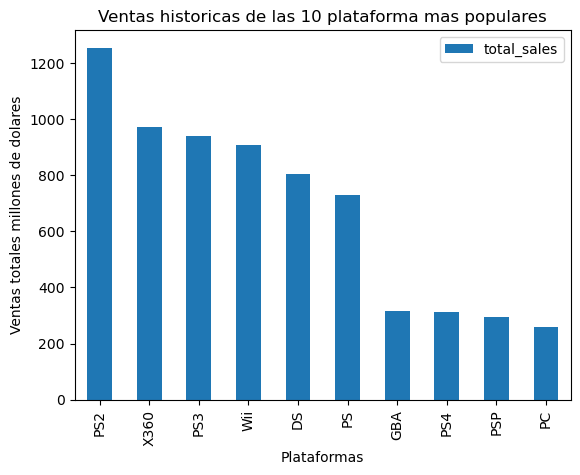

In [24]:
# Se realiza un grafico de barras para conocer las plataformas mas populares visualmente

sales_per_plataform.head(10).plot(kind = 'bar',
                                  x = 'platform',
                                title = "Ventas historicas de las 10 plataforma mas populares",
                                xlabel = "Plataformas",
                                ylabel = "Ventas totales millones de dolares")

plt.show()

In [25]:
# Se agrupa las plataformas mas populares anteriores al año 2000
old_popular_per_year = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
old_popular_per_year = old_popular_per_year.query('year_of_release < 2000 & year_of_release != 0')

print(old_popular_per_year.head(10))
print(top_10)

    year_of_release platform  total_sales
6              1998       PS       169.49
13             1999       PS       144.53
17             1997       PS       136.17
34             1996       PS        94.70
43             1989       GB        64.97
48             1999      N64        57.87
55             1985      NES        53.44
60             1984      NES        50.08
61             1998      N64        49.24
66             1988      NES        45.01
['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'GBA' 'PS4' 'PSP' 'PC']


Las plataformas mas populares desde mediados de los años 80s hasta finales de los años 90s han sido PS, GB, NES y N64

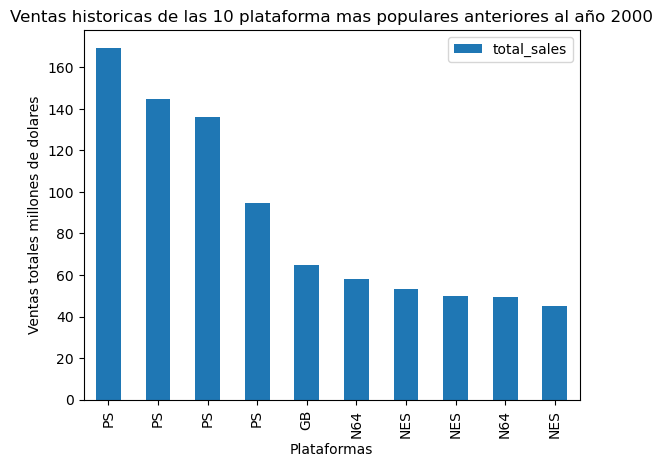

In [26]:
# Se realiza un grafico de barras para conocer las plataformas mas populares anteriores al año 2000

old_popular_per_year.head(10).plot(kind = 'bar',
                                  x = 'platform',
                                  y = "total_sales",
                                title = "Ventas historicas de las 10 plataforma mas populares anteriores al año 2000",
                                xlabel = "Plataformas",
                                ylabel = "Ventas totales millones de dolares")

plt.show()

In [27]:
# Se agrupan las plataformas mas populares apartir del año 2000
new_popular_per_year = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
new_popular_per_year = new_popular_per_year.query('year_of_release >= 2000 & year_of_release != 0')
print(new_popular_per_year.head(10))

    year_of_release platform  total_sales
0              2004      PS2       211.81
1              2009      Wii       206.97
2              2002      PS2       205.38
3              2003      PS2       184.31
4              2008      Wii       171.32
5              2010     X360       170.03
7              2001      PS2       166.43
8              2005      PS2       160.66
9              2011      PS3       156.78
10             2007      Wii       152.77


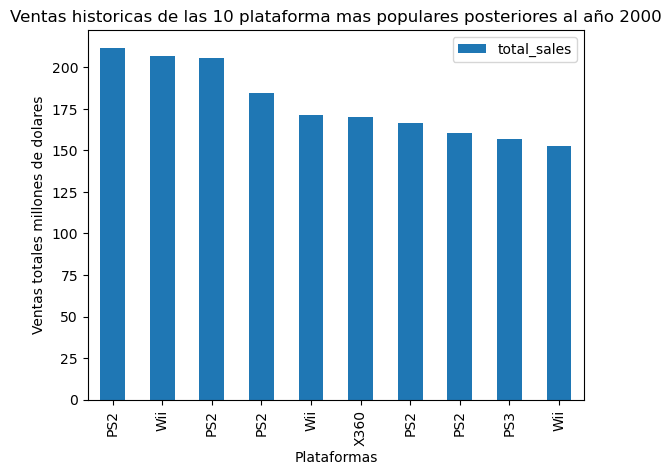

In [28]:
# Se realiza un grafico de barras para conocer las plataformas mas populares posteriores al año 2000

new_popular_per_year.head(10).plot(kind = 'bar',
                                  x = 'platform',
                                  y = "total_sales",
                                title = "Ventas historicas de las 10 plataforma mas populares posteriores al año 2000",
                                xlabel = "Plataformas",
                                ylabel = "Ventas totales millones de dolares")

plt.show()

Se puede observar que las plataformas mas populares apartir del  2000 han sido el PS2, WII, XBOX360, y PS3
Pasaron 9 años para que el PS3 destrone al PS2

In [29]:
# Se agrupan las plataformas mas populares apartir del año 2011
actual_popular_per_year = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
actual_popular_per_year = actual_popular_per_year.query('year_of_release >= 2011 & year_of_release != 0')
print(actual_popular_per_year.head(10))

    year_of_release platform  total_sales
9              2011      PS3       156.78
14             2011     X360       143.84
25             2015      PS4       118.90
27             2013      PS3       113.25
28             2012      PS3       107.36
30             2014      PS4       100.00
31             2012     X360        99.74
35             2013     X360        88.58
41             2016      PS4        69.25
44             2011      3DS        63.20


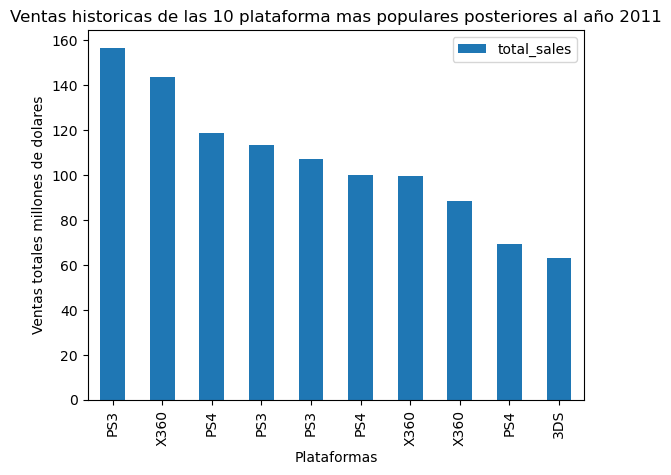

In [30]:
# Se realiza un grafico de barras para conocer las plataformas mas populares posteriores al año 2011

actual_popular_per_year.head(10).plot(kind = 'bar',
                                  x = 'platform',
                                  y = "total_sales",
                                title = "Ventas historicas de las 10 plataforma mas populares posteriores al año 2011",
                                xlabel = "Plataformas",
                                ylabel = "Ventas totales millones de dolares")

plt.show()

Nos deberiamos enfocar en realizar lanzamientos de juegos para la PS4, el XBOX360 y por popularidad para la PS3

Si utilizamos la informacion de que pasaron 9 años para que el PS3 destrone al PS2, podemos esperar que el PS4 sera popular hasta el año 2022 para que salga una nueva consola PS5

En este proyecto me enfocare en analizar los datos del año 2011 en adelante por las siguientes razones:
- A partir de este año son consolas con lanzamientos recientes, por lo tanto se encontraran activas y funcionales para los posibles clientes
- En estos años se empezaro a popularisar en estas consulas la venta de juegos en linea, por lo que se convirtio en un negocio mundial donde no habia necesidad de ir a una tienda fisica.
- En estos años se empezo a popularizar las subscripciones para jugar online, por lo tanto es algo que seguira creciendo año tras años para las consolas que pueden soportar estas tecnologias.

#### c) Que plataformas son lideres en ventas? Cuales crecer y cuales reducen sus ventas?

Nos enfocaremos en los datos apartir del año 2000

In [31]:
#Se crea una pivot_table del DataFrame filtrado de las ventas apartir del año 2000

new_popular_per_year_pivot = new_popular_per_year.pivot(index = "year_of_release", columns = "platform", values = "total_sales")
print(new_popular_per_year_pivot)

platform           3DS    DC      DS     GB    GBA     GC    N64     PC  \
year_of_release                                                           
2000               NaN  5.99     NaN  19.76   0.07    NaN  33.97   4.66   
2001               NaN  1.07     NaN   9.24  61.53  26.34   3.25   5.47   
2002               NaN  0.29     NaN    NaN  74.16  51.81   0.08   8.57   
2003               NaN   NaN     NaN    NaN  56.67  50.61    NaN   8.84   
2004               NaN   NaN   17.27    NaN  77.91  28.82    NaN  10.39   
2005               NaN   NaN  130.14    NaN  33.86  27.62    NaN   4.37   
2006               NaN   NaN  119.81    NaN   5.28  11.26    NaN   2.85   
2007               NaN  0.02  146.94    NaN   3.40   0.27    NaN   9.28   
2008               NaN  0.04  145.31    NaN    NaN    NaN    NaN  12.42   
2009               NaN   NaN  119.54    NaN    NaN    NaN    NaN  16.91   
2010               NaN   NaN   85.02    NaN    NaN    NaN    NaN  24.28   
2011             63.20   

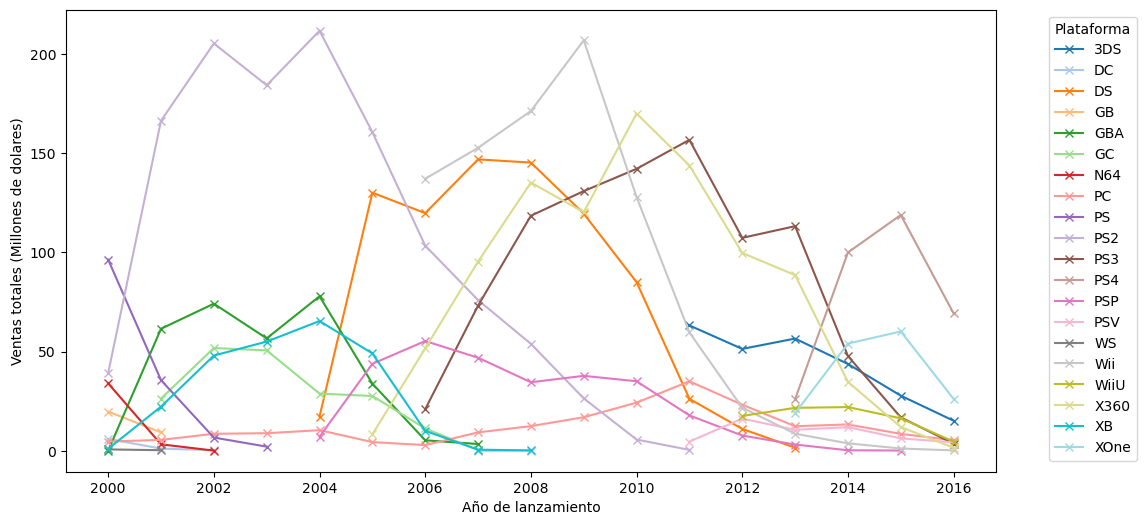

In [32]:
# Se realiza un grafico de lineas comparativo para las plataformas mas populares apartir del año 2000

palette = plt.get_cmap('tab20').colors #Se obtiene una paleta de colores para que no se repitan los mismos en las lineas

new_popular_per_year_pivot.plot(kind = "line",
                                marker = "x",
                                figsize = (12, 6),
                                xlabel = "Año de lanzamiento",
                                ylabel = "Ventas totales (Millones de dolares)",
                                color=palette[:len(new_popular_per_year_pivot.columns)])

plt.legend(title = "Plataforma", loc = "upper left", bbox_to_anchor = (1.05 , 1))
plt.show()

Se puede observar que las plataformas mas populares han tenido su pico de ventas y despues han caido a lo largo de los años, en estos casos tenemos al:

-PS2 
-Nintendo DS
-Nintendo Wii
-X360
-PS3

Esto se debe a que son plataformas que tienen varios años de haber sido lanzadas, y han tenido sus nuevas actualizaciones, por lo tanto la gente mas devota prefiere cambiarse de a poco a su nueva actualizacion.

Por otro lado observamos plataformas que no fueron populares, y sus ventas fueron bajos, en este caso tenemos al:

-PS
-N64
-DS
-WS
-GBA
-XB

Estas plataformas no fueron tan populares, y puede ser debido al exito que tenia el PS en esos años de lanzamiento

Algo interesante que podemos tener en cuenta es que los usuarios de PC son los que menos rotacion tienen, pese a que las ventas de PC no son tan altas, sus usarios son muy fieles, y sus ventas se mantienen casi constantes.

Se puede observar que las nuevas plataformas con proyeccion son:
-PS4
-XONE
-3DS

Y se puede seguir enfocado en las plataformas clasicas que son:
-PC
-PS3
-X360

#### d) Diagrama de cajas para las ventas globales de todos los juegos

Text(0.5, 1.0, 'Comparacion con BoxPlot de las 10 plataformas mas populares')

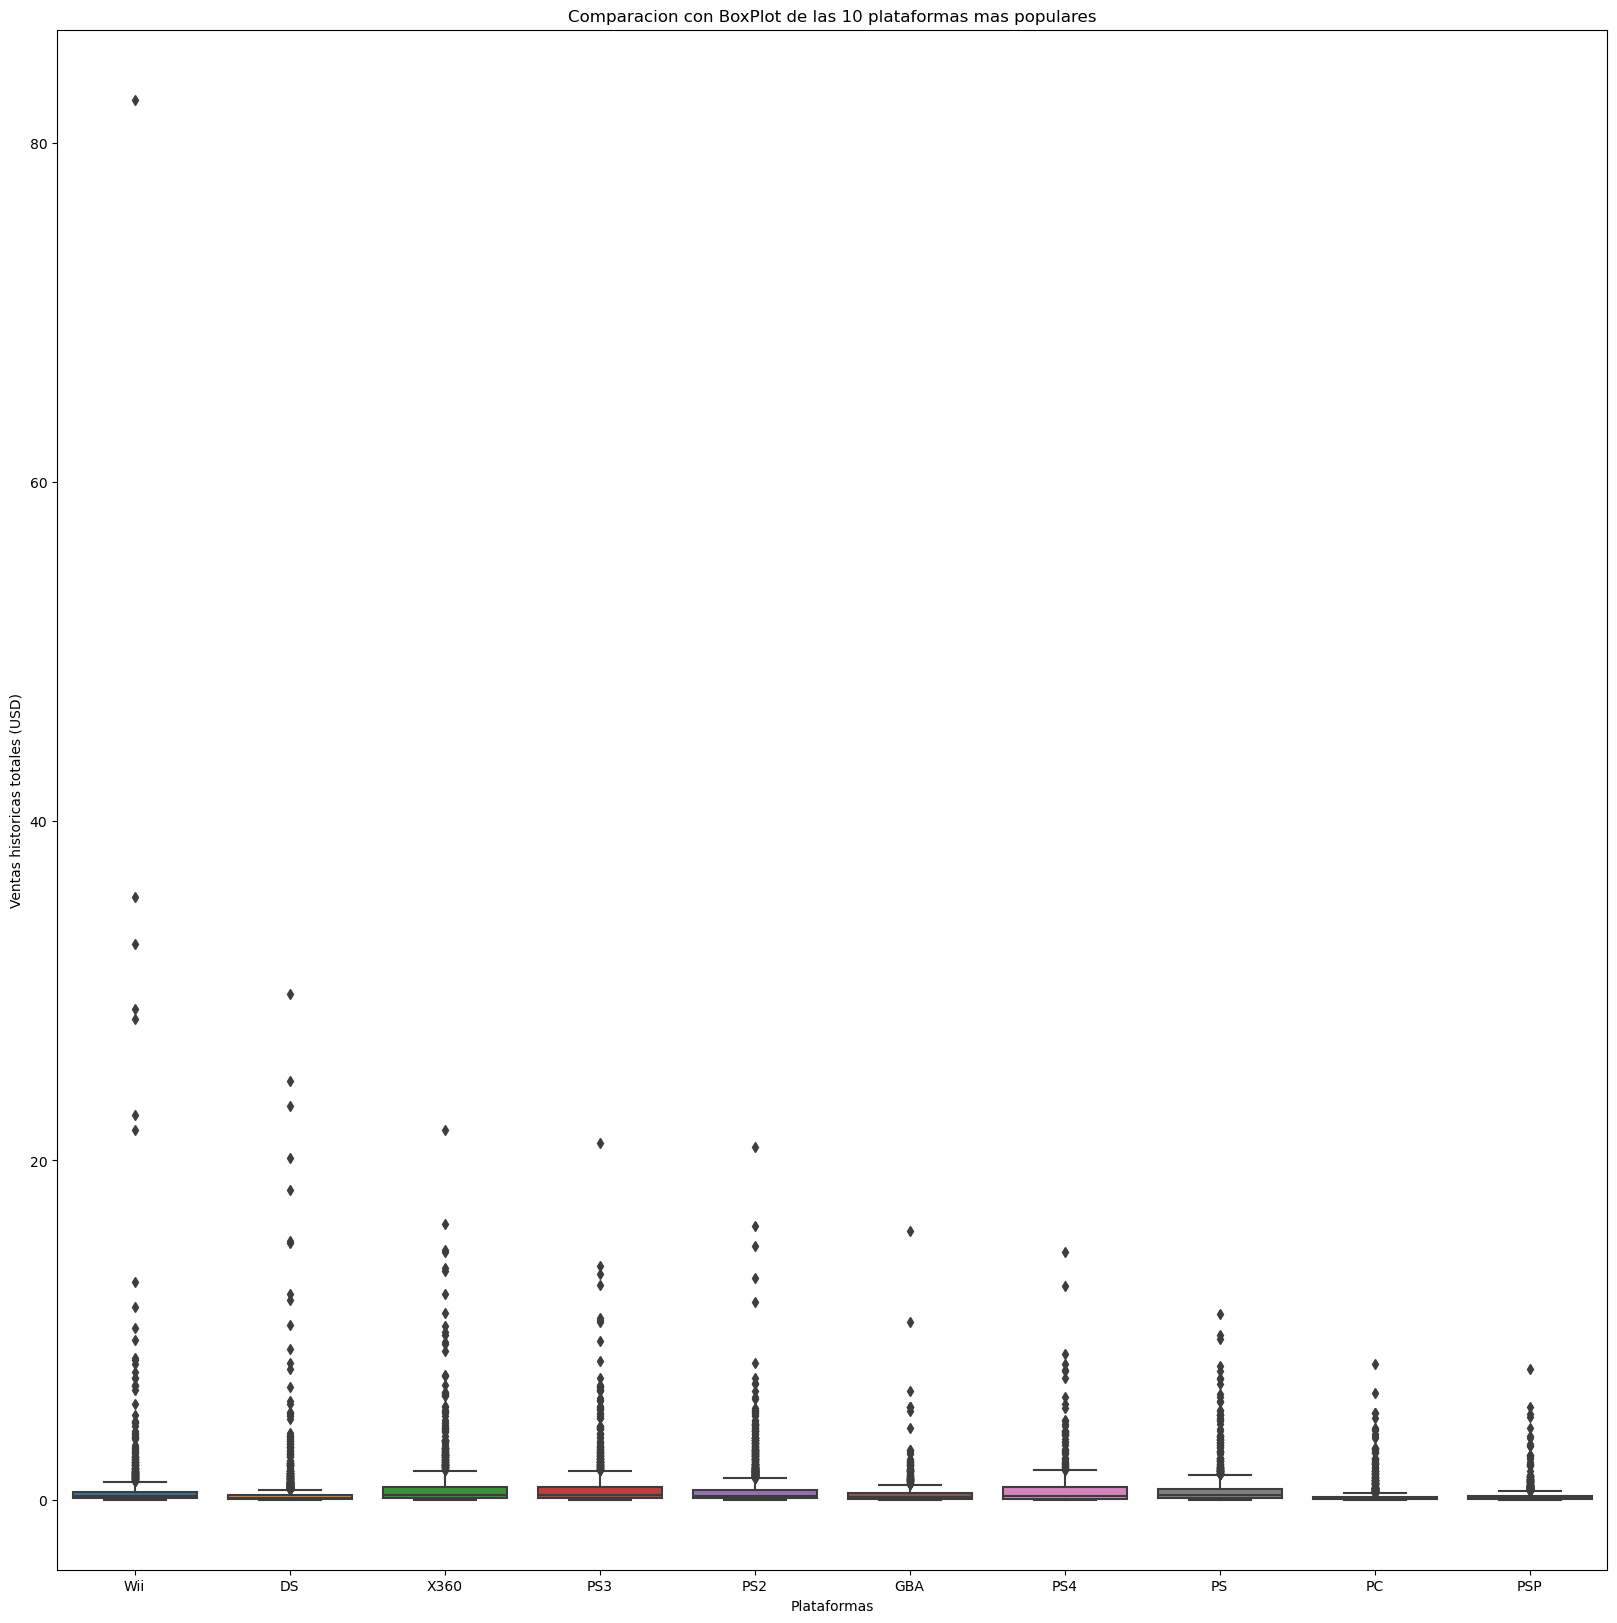

In [33]:
# Se crea un diagrama de cajas para ver la comparacion de ventas para las 10 plataformas mas populares
          
games_box = games.groupby(['platform', 'name'])['total_sales'].sum().sort_values(ascending=False).reset_index() #Se agrupa el DF principal

games_box = games_box.query('platform in @top_10') #Se obtiene solo los datos de la lista top_10

plt.figure(figsize=(20,20)) #Se establece una medida del grafico a mostrar
sns.boxplot(x = 'platform' , y = "total_sales",  data = games_box) #Se crea boxplot de las plataformas mas populares
plt.xlabel('Plataformas')
plt.ylabel("Ventas historicas totales (USD)")
plt.title("Comparacion con BoxPlot de las 10 plataformas mas populares")

La diferencia entre las ventas es significativa en algunos casos, como en las plataformas Wii,y DS ya que tiene mucha dispersion en sus ventas, con valores que alcanzan los 80 millones en ventas en el caso del Wii, y supera los 30 millones en el caso del DS.
Otras plataformas como X360, PS3 y PS2 tambien presentas dispersion en sus ventas pero con menos valoeres extremos, superando los 20 millones de dolares.

Las ventas promedio son muy similares entra las plataformas, por lo que se puede deducir que todas han tenido sus ventas muy similares, salvo valores dispersos que explicamos anteriormente que se debe a titulos de juegos muy populares que dispararon sus ventas.






#### e) Comparacion de reseñas de usuarios y criticos con las ventas de los juegos de la plataforma Wii

In [34]:
#Se calculaa la correlacion entre "critic_score" y "total_sales" para nintendo Wii

sales_critic_score = games[games['platform'] == 'Wii'] #Se filtra del DF principal solo la plataforma Wii

sales_critic_score = sales_critic_score[['name', 'critic_score', 'total_sales']] #Se filtra por filas necesarias

corr_critic_sales = (sales_critic_score['critic_score'].corr(sales_critic_score['total_sales'])) #Se calcula la correlacion
print(f'La correlacion es entre las ventas totales y la puntuacion de la critica es de {corr_critic_sales}')
print('La correlacion es positiva debil')

La correlacion es entre las ventas totales y la puntuacion de la critica es de 0.17755988806089948
La correlacion es positiva debil


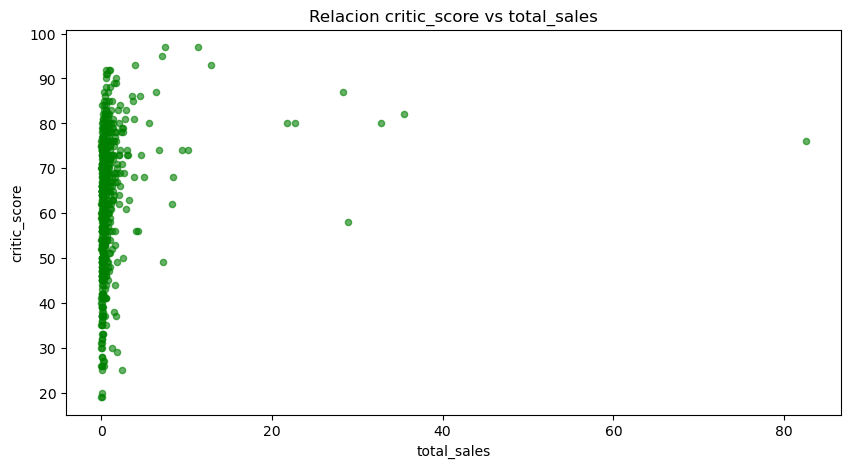

In [35]:
# Grafico de dispersion entre "critic_score" y "total_sales" para nintendo Wii

sales_critic_score.plot(x = "total_sales",
                        y = 'critic_score',
                        kind = 'scatter',
                        title = "Relacion critic_score vs total_sales",
                        color = "green",
                        alpha = 0.6,
                        figsize= [10,5]
                        )

plt.show()

La correlacion de 0.17 nos dice que tienen una correlacion positiva debil, lo que nos quiere decir que si una variable aumenta la otra tambien tiende aumentar ligeramenta, pero no es una relacion fuerte ni consistente.

En el grafico de dispersion podemos ver juegos muy buen punteados con baja venta, y juegos menos punteados con alta venta, por lo que a los compradores no les importa mucho la calificacion de los criticos, por lo que los compradores se pueden basar mas en otras caracteristicas como la popularidad el titulo, o el marketing que la empresa desarrolladora crea para llegar al cliente final.

In [36]:
#Se calculaa la correlacion entre "user_score" y "total_sales" para nintendo Wii

sales_user_score = games[games['platform'] == 'Wii'] #Se filtra del DF principal solo la plataforma Wii

sales_user_score = sales_user_score[['name', 'user_score', 'total_sales']] #Se filtra por filas necesarias

corr_user_sales = (sales_user_score['user_score'].corr(sales_user_score['total_sales'])) #Se calcula la correlacion 
print(f'La correlacion es entre las ventas totales y la puntuacion de los usuarios es de {corr_user_sales}')
print('La correlacion es positiva debil')

La correlacion es entre las ventas totales y la puntuacion de los usuarios es de 0.11241436067003169
La correlacion es positiva debil


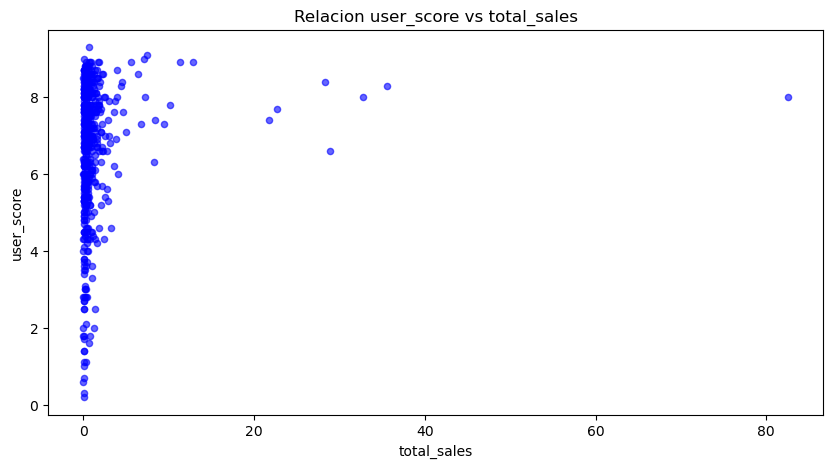

In [37]:
# Grafico de dispersion entre "user_score" y "total_sales" para nintendo Wii

sales_user_score.plot(x = "total_sales",
                        y = 'user_score',
                        kind = 'scatter',
                        title = "Relacion user_score vs total_sales",
                        color = "blue",
                        alpha = 0.6,
                        figsize= [10,5]
                        )

plt.show()

La correlacion de 0.11 nos dice que tienen una correlacion positiva debil, lo que nos quiere decir que si una variable aumenta la otra tambien tiende aumentar ligeramenta, pero no es una relacion fuerte ni consistente.

En el grafico de dispersion podemos ver juegos muy buen punteados con baja venta, y juegos menos punteados con alta venta, se puede deber a que los compradores primero compran eel juego por razones de popularidad o marketing y despues de probarlo lo puntean, por lo que no es una variable muy confiable para que un juego sea un exito en ventas o no.

#### f) Comparacion de ventas de Juegos de Wii vs DS

In [38]:
comparison_wii_ds = games[(games['platform'] == 'Wii') | (games['platform'] == 'DS')] #Se filtra las filas que contengan las plataformas Wii y Ds

repeated_games = comparison_wii_ds['name'].value_counts() #Se filtran los juegos que se han vendido en ambas plataformas
repeated_games = repeated_games[repeated_games>1].index
games_in_both_platform = comparison_wii_ds[comparison_wii_ds['name'].isin(repeated_games)] #Se filtra la informacion mediante el metodo isin 

games_in_both_platform = games_in_both_platform[games_in_both_platform['platform'] == "DS"] #Se filtra los juegos que existen en Wii para DS
games_in_both_platform_critic = games_in_both_platform[['name', 'critic_score', 'total_sales']]

corr_games_in_both_platform_critic = (games_in_both_platform_critic['critic_score']).corr(games_in_both_platform_critic['total_sales']) #Se saca la correlacion entre critic_score y total _sales

print(f'La correlacion es entre las ventas totales y la puntuacion de los criticos es de {corr_games_in_both_platform_critic}')
print('La correlacion es positiva debil')

La correlacion es entre las ventas totales y la puntuacion de los criticos es de 0.18548444562724387
La correlacion es positiva debil


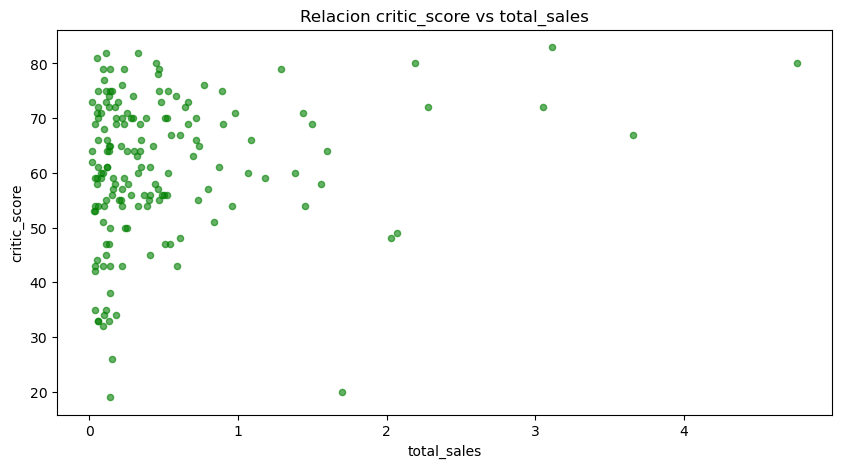

In [39]:
# Grafico de dispersion entre "critic_score" y "total_sales" para nintendo DS

games_in_both_platform_critic.plot(x = "total_sales",
                        y = 'critic_score',
                        kind = 'scatter',
                        title = "Relacion critic_score vs total_sales",
                        color = "green",
                        alpha = 0.6,
                        figsize= [10,5]
                        )

plt.show()

La correlacion de 0.18 nos dice que tienen una correlacion positiva debil, lo que nos quiere decir que si una variable aumenta la otra tambien tiende aumentar ligeramenta, pero no es una relacion fuerte ni consistente.

En el grafico de dispersion podemos ver juegos muy buen punteados con baja venta, y juegos menos punteados con alta venta, por lo que a los compradores no les importa mucho la calificacion de los criticos, por lo que los compradores se pueden basar mas en otras caracteristicas como la popularidad el titulo, o el marketing que la empresa desarrolladora crea para llegar al cliente final.
Es una grafico muy similar a la de la plataforma Nintendo Wii por lo que las conclusiones son las mismas para ambas plataformas.

In [40]:
#Se obtiene la correlacion para user_score y total_sales de los juegos en la plataforma DS

games_in_both_platform_user = games_in_both_platform[['name', 'user_score', 'total_sales']]

corr_games_in_both_platform_user = (games_in_both_platform_user['user_score']).corr(games_in_both_platform_critic['total_sales']) #Se saca la correlacion entre user_score y total _sales

print(f'La correlacion es entre las ventas totales y la puntuacion de los criticos es de {corr_games_in_both_platform_user}')
print('La correlacion es negativa debil')

La correlacion es entre las ventas totales y la puntuacion de los criticos es de -0.01633454901652795
La correlacion es negativa debil


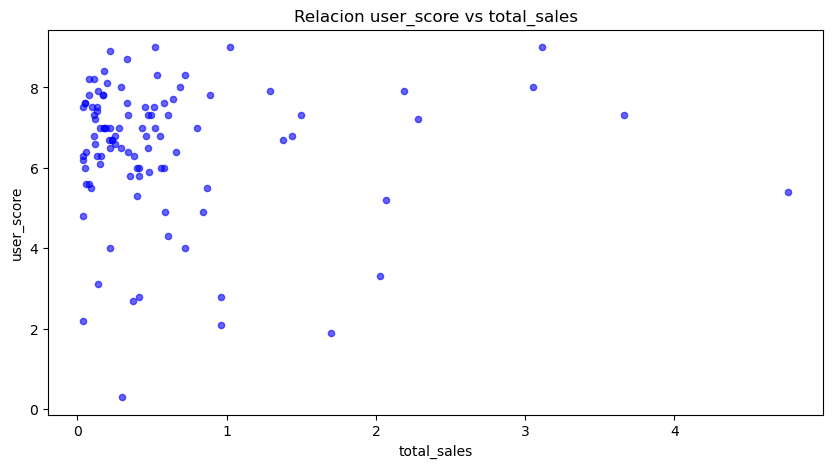

In [41]:
# Grafico de dispersion entre "user_score" y "total_sales" para nintendo DS

games_in_both_platform_user.plot(x = "total_sales",
                        y = 'user_score',
                        kind = 'scatter',
                        title = "Relacion user_score vs total_sales",
                        color = "blue",
                        alpha = 0.6,
                        figsize= [10,5]
                        )

plt.show()

La correlacion de -0.016 nos dice que tienen una correlacion positiva debil esta correelacion tiende a 0 por lo que no existe una relacion directa entre ambas columnas.

En el grafico de dispersion podemos ver juegos muy buen punteados con baja venta, y juegos menos punteados con alta venta, se puede deber a que los compradores primero compran eel juego por razones de popularidad o marketing y despues de probarlo lo puntean, por lo que no es una variable muy confiable para que un juego sea un exito en ventas o no.
Estas conclusiones son muy similares a las de la plataforma Nintendo Wii por lo que se puede comprobar que es algo que va a suceder con el resto de plataformas.

#### g) Comparacion por genero de juego

In [42]:
#Se saca los generos mas rentables de todas las plataformas

games_by_genre = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print('Los generos mas rentables son: \n')
print(games_by_genre.head(5))

Los generos mas rentables son: 

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Name: total_sales, dtype: float64


Las categoria de juego mas rentable es de Action, seguida por Sports y Shooter, esto quiere decir que sin importar la plataforma, un juego que este dentro de estas categorias va a ser un exito siempre y cuando se ofrezca un producto bueno al consumidor.

In [43]:
#Se saca los generos menos rentables de todas las plataformas

print('Los generos menos rentables son: \n')
print(games_by_genre.tail(5))

Los generos menos rentables son: 

genre
Simulation    389.97
Puzzle        242.57
Adventure     237.59
Strategy      174.23
Unknown         2.42
Name: total_sales, dtype: float64


Las categoria de juego menos rentable es de Strategy, seguida por Adventure y Puzzle, esto quiere decir que los desarrolladores que quieran entrar en estas categorias deberan esforzarse mucho mas por crear un producto que atraiga a los consumidores que prefieren las categorias mas populares, de igual manera los equipos de marketing para convenser al usuario final de comprar su producto.

### 5: Crear un perfil de usuario para cada region

#### a) De las cinco plataformas principales, describir las variaciones en sus cuotas mercado entre cada region

In [44]:
#Se obtienen las 5 plataformas mas populares
top_5 = sales_per_plataform['platform'].head(5).unique()
print(top_5)

['PS2' 'X360' 'PS3' 'Wii' 'DS']


In [45]:
games_top_5 = games.query('platform in @top_5') #Se obtiene solo los datos de la lista top_5

games_top_5_na = games_top_5.groupby('platform')['na_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "na"
games_top_5_eu = games_top_5.groupby('platform')['eu_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "eu"
games_top_5_jp = games_top_5.groupby('platform')['jp_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "jp"
games_top_5_other = games_top_5.groupby('platform')['other_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "other"

#Se une en un nuevo DF los datos obtenidos de las ventas por region
games_top_5_comparison = games_top_5_na.merge(games_top_5_eu, on="platform")
games_top_5_comparison = games_top_5_comparison.merge(games_top_5_jp, on='platform')
games_top_5_comparison = games_top_5_comparison.merge(games_top_5_other, on='platform')
games_top_5_comparison

,platform,na_sales,eu_sales,jp_sales,other_sales
0,DS,382.40,188.89,175.57,59.26
1,PS2,583.84,339.29,139.20,193.44
2,PS3,393.49,330.29,80.19,135.68
3,Wii,496.90,262.21,69.33,79.07
4,X360,602.47,270.76,12.43,85.76


In [46]:
# Se calcula la suma total de cada plataforma con la funcion sales

games_top_5_comparison['total_sales'] = games_top_5_comparison.apply(sales, axis=1)

games_top_5_comparison


,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,DS,382.40,188.89,175.57,59.26,806.12
1,PS2,583.84,339.29,139.20,193.44,1255.77
2,PS3,393.49,330.29,80.19,135.68,939.65
3,Wii,496.90,262.21,69.33,79.07,907.51
4,X360,602.47,270.76,12.43,85.76,971.42


In [47]:
#Se crea una funcion para calcular el porcentaje de venta en cada region por plataforma

def market_sale(row):
    
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    total_sales = row['total_sales']
    
    na_sales_per = ((na_sales)/(total_sales))*100
    eu_sales_per = ((eu_sales)/(total_sales))*100
    jp_sales_per = ((jp_sales)/(total_sales))*100
    other_sales_per = ((other_sales)/(total_sales))*100
    return pd.Series([na_sales_per, eu_sales_per, jp_sales_per, other_sales_per], index =['na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per'])

#Se añaden las nuevas columnas al DF de los porcentajes de ventas por plataforma en cada region
games_top_5_comparison[['na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per']] = games_top_5_comparison.apply(market_sale, axis=1) 

#Se filtra el nuevo DF con porcentajes de ventas por plataformas en cada region
games_top_5_comparison = games_top_5_comparison[['platform','na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per']]

In [48]:
print(games_top_5_comparison)

  platform  na_sales_per  eu_sales_per  jp_sales_per  other_sales_per
0       DS     47.437106     23.431995     21.779636         7.351263
1      PS2     46.492590     27.018483     11.084832        15.404095
2      PS3     41.876231     35.150322      8.534029        14.439419
3      Wii     54.754218     28.893346      7.639585         8.712852
4     X360     62.019518     27.872599      1.279570         8.828313


Se puede observar que el mercado principal en todas las plataformas es el mercado de Norte America, con una venta superior al 40%.
En segundo lugar se encuentra el mercado Europeo.
En tercer lugar el mercado Japones lo ocupa unicamente con el nintendo DS, mientras que en el resto de plataformas ocupa el ultimo lugar.
Mientras que ventas en otras regiones del mundo ocupa el tercer lugar en PS2, PS3, Wii Y X360, mientras que para ventas del nintendo DS ocupa el ultimo lugar.

Podemos obtener de conclusiones que el mercado mas fuerte es el mercado de Norte America, seguido por el Europeo, esto puede deberse a la economia de estas regiones, que permite a los usuario realizar gastos en sistemas de entretenimiento, mientras que en el resto del mundo, la gente prefiere gastar su dinero en cosas mas importante para su supervivencia basica, en Japon es un mercado interesante, ya que las ventas no son tan altas ya que se esta comparando una poblacion pequeña de un solo pais con poblaciones mucho mas grandes, por lo que tambien es un mercado muy importante con una gran economia para atacar con nuevos productos.

#### b) Los cinco generos principales

In [49]:
#Se obtienen los 5 generos mas populares

games_by_genre = games_by_genre.reset_index()
top_5_genre = games_by_genre['genre'].head(5).unique()
print(top_5_genre)

['Action' 'Sports' 'Shooter' 'Role-Playing' 'Platform']


In [50]:
genre_top_5 = games.query('genre in @top_5_genre') #Se obtiene solo los datos de la lista top_5_genre

genre_top_5_na = genre_top_5.groupby('genre')['na_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "na"
genre_top_5_eu = genre_top_5.groupby('genre')['eu_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "eu"
genre_top_5_jp = games_top_5.groupby('genre')['jp_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "jp"
genre_top_5_other = games_top_5.groupby('genre')['other_sales'].sum().reset_index() #Se obtiene la venta de las plataformas para el mercado "other"

#Se une en un nuevo DF los datos obtenidos de las ventas por region
genre_top_5_comparison = genre_top_5_na.merge(genre_top_5_eu, on="genre")
genre_top_5_comparison = genre_top_5_comparison.merge(genre_top_5_jp, on='genre')
genre_top_5_comparison = genre_top_5_comparison.merge(genre_top_5_other, on='genre')
genre_top_5_comparison

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,879.01,519.13,75.89,132.61
1,Platform,445.50,200.35,28.49,28.49
2,Role-Playing,330.81,188.71,113.65,29.93
3,Shooter,592.24,317.34,16.73,70.27
4,Sports,684.43,376.79,57.06,103.69


In [51]:
# Se utiliza la funcion sale para obtener la fila total_sale del DF genre_top_5_comparison
genre_top_5_comparison['total_sales'] = genre_top_5_comparison.apply(sales, axis=1)

#Se utiliza la funcion market_sale para obtener los porcentajes de mercado en los diferentes percados por genero
genre_top_5_comparison[['na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per']] = genre_top_5_comparison.apply(market_sale, axis=1)

genre_top_5_comparison = genre_top_5_comparison[['genre', 'na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per']] #Se filtran las columnas necesarias

print(genre_top_5_comparison)

          genre  na_sales_per  eu_sales_per  jp_sales_per  other_sales_per
0        Action     54.711074     32.311532      4.723522         8.253871
1      Platform     63.386594     28.506182      4.053612         4.053612
2  Role-Playing     49.888403     28.458754     17.139195         4.513648
3       Shooter     59.427241     31.842903      1.678741         7.051115
4        Sports     56.010377     30.834636      4.669509         8.485478


Por genero sigue siendo el mercado de Norte America el que mas ventas proporciona, superando el 50% del mercado global, con una clara preferencia por los juegos de plataformas, seguidos por los juegos de disparos.
El segundo lugar nuevamente se lleva Europa, con una mayor participacion del mercado que simplemente por plataforma.
El 3er lugar se lo lleva el mercado global fuera de Norte America, Europa y Japon, a exepcion del genero de Role-Playing que se lo lleva el mercado Japones el 3er lugar.

Con estos datos confirmamos que Norte America y Europa solo mercados mas fuertes para ventas de videeo juegos y plataformas.

#### c) Las clasificaciones ESRB afectan las ventas en regiones individuales?

In [52]:
# Comparacion de clasificacion ESRB con ventas globales

esrb_sales = games[['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']] # Se filtran las columnas necesarias del DF principal

esrb_na = esrb_sales.groupby('rating')['na_sales'].sum().reset_index() #Se obtiene las venta por ESRB  para el mercado "na"
esrb_eu = esrb_sales.groupby('rating')['eu_sales'].sum().reset_index() #Se obtiene las venta por ESRB para el mercado "eu"
esrb_jp = esrb_sales.groupby('rating')['jp_sales'].sum().reset_index() #Se obtiene las venta por ESRB para el mercado "jp"
esrb_other = esrb_sales.groupby('rating')['other_sales'].sum().reset_index() #Se obtiene las venta por ESRB para el mercado "other"

#Se une en un nuevo DF los datos obtenidos de las ventas por region
esrb_sales_comparison = esrb_na.merge(esrb_eu, on="rating")
esrb_sales_comparison = esrb_sales_comparison.merge(esrb_jp, on='rating')
esrb_sales_comparison = esrb_sales_comparison.merge(esrb_other, on='rating')

esrb_sales_comparison

,rating,na_sales,eu_sales,jp_sales,other_sales
0,AO,1.26,0.61,0.00,0.09
1,E,1292.99,710.25,198.11,234.17
2,E10+,353.32,188.52,40.20,73.56
3,EC,1.53,0.11,0.00,0.11
4,K-A,2.56,0.27,1.46,0.03
5,M,748.48,483.97,64.24,177.10
6,RP,0.00,0.08,0.00,0.01
7,T,759.75,427.03,151.40,155.17
8,Uknown,1242.46,613.83,841.96,151.08


In [53]:
# Se utiliza la funcion sales para obtener el total de las sumas por rating 

esrb_sales_comparison['total_sales'] = esrb_sales_comparison.apply(sales, axis = 1)

#Se utiliza la funcion market_sale para obtener los porcentajes de ventas por region para el Rating

esrb_sales_comparison[['na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per']] = esrb_sales_comparison.apply(market_sale, axis = 1)
esrb_sales_comparison = esrb_sales_comparison[['rating', 'na_sales_per', 'eu_sales_per', 'jp_sales_per', 'other_sales_per']]

In [54]:
print(esrb_sales_comparison)

   rating  na_sales_per  eu_sales_per  jp_sales_per  other_sales_per
0      AO     64.285714     31.122449      0.000000         4.591837
1       E     53.088868     29.162150      8.134197         9.614785
2    E10+     53.892617     28.755339      6.131788        11.220256
3      EC     87.428571      6.285714      0.000000         6.285714
4     K-A     59.259259      6.250000     33.796296         0.694444
5       M     50.786069     32.838464      4.358830        12.016637
6      RP      0.000000     88.888889      0.000000        11.111111
7       T     50.875548     28.595440     10.138280        10.390732
8  Uknown     43.605339     21.542959     29.549403         5.302299


Se puede observar que cuando comparamos ventas por clasificacion ESRB podemos encontrar algunas diferencias, en las ventas regionales:
- Norte America sigue siendo el lider mundial en compras, a exepcion de juego RP (Clasificacion Pendiente) que puede deberse a que las autoridades no permiten lanzamientos de juegos sin clasificacion en Norte America o hacen falta datos de clasificaciones.
- Europa conserva en la mayoria de juegos por clasificacion su 2do lugar, a exepcion de juegos con clasificacion K-A.
- Por clasificacion Japon obtiene el 3er lugar en ventas globales, y es el 2do mercado global mas fuerte en juegos con clasificaicon K-A y dentro de la categoria "Uknown", por otro lado no tiene ventas en A0, EC y RP, quiza se debe a que el gobierno tiene restricciones en la venta de estas categorias, por lo que se podria investigar un poco mas.
- Por ultimo el resto del mercado global obtiene el 4to lugar en ventas por clasificcion.

Las diferencias por rating en las ventas de los diferentes mercados, puede deberse a restricciones politicas en la venta de las diferentes categorias de video juegos, por lo que puede afectar sus ventas, de igual manera una clasificacion en Norte America no es la misma que en Europa o en Japon, por lo que vamos a tener esas pequeñas variaciones, pero es importante tener en cuenta las clasificacion porque deberemos seguir las reglas de venta por pais o region donde presentemos nuestros videos juegos o platafprmas.

### 6: Pruebas de hipotesis 

#### a) Las calificaciones promedio de los usuarios para las plataformas Xbox one y PC son las mismas?

In [63]:
test_1 = games[(games['platform'] == 'XOne') | (games['platform'] == 'PC')] #Se filtrar laas filas del DF principal que contengan XOne y PC

#Se obtiene la informacion de user_score para XOne 
xbox_one = test_1[(test_1['platform'] == 'XOne')].reset_index() 
#Se rellenan los valores NaN para no tener problemas al calcular la prueba de hipotesis
xbox_one = xbox_one['user_score'].fillna('0') 
#Se vuelve a cambiar el tipo de dato a float
xbox_one = xbox_one.astype('float')

#Se obtiene la informacion de user_score para PC
pc = test_1[test_1['platform'] == 'PC'].reset_index()
#Se rellenan los valores NaN para no tener problemas al calcular la prueba de hipotesis
pc = pc['user_score'].fillna('0')
#Se vuelve a cambiar el tipo de dato a float
pc = pc.astype('float')


In [73]:
#Prueba de Lavine 
#H0 = Las varianzas del user_score de XOne y PC son iguales
#H1 = Las varianzas del user_score de XOne y PC NO son iguales

levene_1 = st.levene(xbox_one, pc) #Se hace la prueba de levene
p_l1 = 0.05 #Se toma un valor p de 0.05

print ('Valor P:', levene_1.pvalue)
print()
if (levene_1.pvalue < p_l1):
    print('No se puede rechazar H0')
    print('Las varianzas de Xone y PC son las mismos')
else:
    print('Rechazamos H0')
    print('Las varianzas de Xone y PC NO son las mismos')
    
print (levene_1.pvalue)


Valor P: 0.87652773153073

Rechazamos H0
Las varianzas de Xone y PC NO son las mismos
0.87652773153073


In [62]:
# Ho = Las calificaciones promedio de los usuarios de las plataformas Xbox one y Pc son las mismas
# H1 = Las calificaciones promedio de los usuarios de las plataformas Xbox one y Pc son diferentes

p = 0.01 #Valor P para obtener una significacian en la prueba del 99%
result_1 = st.ttest_ind(xbox_one, pc, equal_var = False) #Se realiza la prueba de hipotesis

print('Valor P:', result_1.pvalue)
print()

#Se crea un condiciona que nos muestre el resultado de la prueba de hipotesis 

if (result_1.pvalue < p):
    print('No se puede rechazar H0')
    print('Las calificaciones de los usuarios para XOne y PC son los mismos')
else:
    print('Rechazamos H0')
    print('Las calificaciones de los usuarios para XOne y PC NO son los mismos')

Valor P: 0.0005315801015576501

No se puede rechazar H0
Las calificaciones de los usuarios para XOne y PC son los mismos


In [56]:
#Comprobamos nuestra prueba de hipotesis obteniendo el promedio de user_score de XOne y PC
test_1_group = test_1.groupby('platform')['user_score'].mean()
test_1_group

platform
PC      7.062468
XOne    6.521429
Name: user_score, dtype: float64

Las calificaciones de los usuarios de XOne y PC son muy similares, ya que pese a que puede haber ciertas similitudes en las graficas del juego, y la fluctuacion de imagenes,que son los puntos fuertes de PC los usuarios estan calificando su experiencia en cuanto a factores del juego, como la historia, modos extras como multijugador, por este motivo la diferencia entre ambas plataformas en muy pequeña.

#### b) Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?

In [74]:
test_2 = games[(games['genre'] == 'Action') | (games['genre'] == 'Sports')] #Se filtrar las filas del DF principal que contengan XOne y PC

#Se obtiene la informacion de user_score para el genero Action
action = test_2[(test_2['genre'] == 'Action')].reset_index() 
action = action['user_score']
#Se rellenan los valores NaN para no tener problemas al calcular la prueba de hipotesis
action = action.fillna('0') 
#Se vuelve a cambiar el tipo de dato a float
action = action.astype('float')

#Se obtiene la informacion de user_score para Sports
sports = test_2[test_2['genre'] == 'Sports'].reset_index()
#Se rellenan los valores NaN para no tener problemas al calcular la prueba de hipotesis
sports = sports['user_score'].fillna('0')
#Se vuelve a cambiar el tipo de dato a float
sports = sports.astype('float')


In [77]:
#Prueba de Lavine 
#H0 = Las varianzas del user_score de Action y Sports son iguales
#H1 = Las varianzas del user_score de Action y Sports NO son iguales

levene_2 = st.levene(action, sports) #Se hace la prueba de levene
p_l2 = 0.05 #Se toma un valor p de 0.05

print ('Valor P:', levene_2.pvalue)
print()
if (levene_2.pvalue < p_l2):
    print('No se puede rechazar H0')
    print('Las varianzas de Xone y PC son las mismos')
else:
    print('Rechazamos H0')
    print('Las varianzas de Xone y PC NO son las mismos')
    

Valor P: 0.0005242010760949489

No se puede rechazar H0
Las varianzas de Xone y PC son las mismos


In [78]:
# Ho = Las calificaciones promedio de los usuarios para los generos de Accion y Deporte son las mismas
# H1 = Las calificaciones promedio de los usuarios para los generos de Accion y Deporte NO son las mismas

p_2 = 0.05 #Valor P para obtener una significacian en la prueba del 99%
result_2 = st.ttest_ind(action, sports, equal_var = True) #Se realiza la prueba de hipotesis

print('Valor P:', result_2.pvalue)
print()

#Se crea un condiciona que nos muestre el resultado de la prueba de hipotesis 

if (result_2.pvalue < p_2):
    print('No se puede rechazar H0')
    print('Las calificaciones de los usuarios para Action y Genre son los mismos')
else:
    print('Rechazamos H0')
    print('Las calificaciones de los usuarios para Action y Genre NO son los mismos')

Valor P: 1.1944013786844029e-08

No se puede rechazar H0
Las calificaciones de los usuarios para Action y Genre son los mismos


In [58]:
#Comprobamos nuestra prueba de hipotesis obteniendo el promedio de user_score de los generos Action y Sport
test_2_group = test_2.groupby('genre')['user_score'].mean()
test_2_group

genre
Action    7.054044
Sports    6.961197
Name: user_score, dtype: float64

Se puede observar en la prueba de hipotesis que las calificaciones de los usuarios de juegos de Action y Sports, son muy similares por lo que podria deberse a que los usuarios de Action tambien son usuarios de Sports, y califican de una manera similar ambas experiencias.

Para ambas pruebas de hipotesis, tome H0 como como lo que queremos rechazar que no es igual, por ese motivo en ambas pruebas de hipotesis se encuentra en que las calificaciones son iguales.

Se tomo el valor de p de 0.01 para tener una mayor significancia, y que nuestra prueba tenga una aceptacion del 99%.

#### 7: Conclusiones Generales

Las plataformas en las que nos deberiamos enfocar para una campaña del año 2017 deberian ser principalmente las plataformas mas nuevas como lo son: PS4, XOne y PC, esta ultima tiene usuarios muy leales ya que año a año su variacion en compras de juegos es minima.
De igual manera deberiamos enfocarnos en las plataformas mas populares de años atras con vigencia actual, como lo son X360, PS3 y 3DS.

En cuanto al genero, deberiamos enfocarnos en los 5 generos mas populares a nivel historico, entre los cuales tenemos a: Action, Platform, Role-Playing, Shooter y Sports.

En cuanto al mercado, se deberia hacer una campaña de marketing bastantee agresiva en Norte America y Europa y con primeras fechas de lanzamiento en estas regiones, y dependiendo del ESRB tambien se podria invertir en una campaña a menos dimension en Japon y el resto del mundo, y con lanzamientos posteriores a la fecha en Norte America y Europa.